# Skills Trend

In [8]:
# Importing Libraries
import pandas as pd
import ast 
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data 
dataset = load_dataset('lukebarousse/data_jobs')
df =  dataset['train'].to_pandas() # Converting to Pandas DataFrame 

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)

Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\Dhruv\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\1d815e9ce232eb27db11939c44eb048fe6d2e9ab (last modified on Sat Apr 12 19:24:11 2025).


In [4]:
df_DA_India = df[(df['job_title'] == 'Data Analyst') & (df['job_country'] == 'India')].copy()
df_DA_India['job_posted_month_no'] = df_DA_India['job_posted_date'].dt.month

In [6]:
df_DA_India_explode= df_DA_India.explode('job_skills')

In [14]:
df_DA_India_pivot = df_DA_India_explode.pivot_table(index='job_posted_month_no',columns='job_skills',aggfunc='size',fill_value=0)
df_DA_India_pivot.loc['Total'] = df_DA_India_pivot.sum()
df_DA_India_pivot = df_DA_India_pivot[df_DA_India_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_India_pivot = df_DA_India_pivot.drop('Total')
df_DA_India_pivot

job_skills,sql,python,excel,tableau,power bi,sas,r,aws,azure,javascript,...,react.js,swift,ringcentral,suse,jupyter,sqlite,ggplot2,gitlab,graphql,no-sql
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,75,55,51,41,26,36,23,6,5,11,...,0,0,0,0,0,0,0,0,1,0
2,64,40,46,32,24,14,23,6,7,8,...,0,0,0,0,0,0,1,0,0,0
3,57,25,32,30,19,10,9,7,6,3,...,0,1,0,1,0,0,0,0,0,1
4,56,35,35,27,23,24,16,4,8,7,...,1,0,0,0,0,0,0,1,0,0
5,44,25,37,24,18,10,9,4,9,3,...,0,0,0,0,0,0,0,0,0,0
6,50,42,34,29,23,28,23,10,9,5,...,0,0,0,0,0,0,0,0,0,0
7,57,37,37,38,20,20,23,5,8,5,...,0,0,0,0,0,0,0,0,0,0
8,88,58,54,47,43,24,28,20,11,7,...,0,0,0,0,0,0,0,0,0,0
9,96,65,59,53,43,26,27,12,5,14,...,0,0,0,0,1,0,0,0,0,0


In [22]:
da_totals = df_DA_India.groupby('job_posted_month_no').size().copy()

In [35]:
df_DA_India_percent = df_DA_India_pivot.div(da_totals/100,axis=0)
df_DA_India_percent =df_DA_India_percent.reset_index()
df_DA_India_percent['job_posted_month'] = df_DA_India_percent['job_posted_month_no'].apply(lambda x:pd.to_datetime(x,format='%m').strftime('%b')) # %B for complete name of Months.
df_DA_India_percent = df_DA_India_percent.set_index('job_posted_month')
df_DA_India_percent = df_DA_India_percent.drop(columns='job_posted_month_no')
df_DA_India_percent


job_skills,sql,python,excel,tableau,power bi,sas,r,aws,azure,javascript,...,react.js,swift,ringcentral,suse,jupyter,sqlite,ggplot2,gitlab,graphql,no-sql
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,13.321492,9.769094,9.058615,7.282416,4.618117,6.394316,4.085258,1.065719,0.888099,1.953819,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.17762,0.000000
Feb,14.382022,8.988764,10.337079,7.191011,5.393258,3.146067,5.168539,1.348315,1.573034,1.797753,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.224719,0.000000,0.00000,0.000000
Mar,14.766839,6.476684,8.290155,7.772021,4.922280,2.590674,2.331606,1.813472,1.554404,0.777202,...,0.000000,0.259067,0.000000,0.259067,0.000000,0.000000,0.000000,0.000000,0.00000,0.259067
Apr,13.930348,8.706468,8.706468,6.716418,5.721393,5.970149,3.980100,0.995025,1.990050,1.741294,...,0.248756,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.248756,0.00000,0.000000
May,16.236162,9.225092,13.653137,8.856089,6.642066,3.690037,3.321033,1.476015,3.321033,1.107011,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
Jun,13.333333,11.200000,9.066667,7.733333,6.133333,7.466667,6.133333,2.666667,2.400000,1.333333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
Jul,13.443396,8.726415,8.726415,8.962264,4.716981,4.716981,5.424528,1.179245,1.886792,1.179245,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
Aug,14.147910,9.324759,8.681672,7.556270,6.913183,3.858521,4.501608,3.215434,1.768489,1.125402,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
Sep,15.584416,10.551948,9.577922,8.603896,6.980519,4.220779,4.383117,1.948052,0.811688,2.272727,...,0.000000,0.000000,0.000000,0.000000,0.162338,0.000000,0.000000,0.000000,0.00000,0.000000


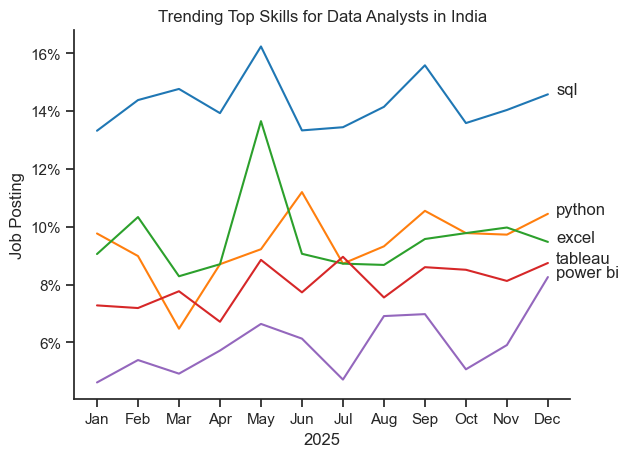

In [50]:
from matplotlib.ticker import PercentFormatter
df_plot = df_DA_India_percent.iloc[:,:5]
sns.lineplot(data=df_plot,dashes=False,palette='tab10')
sns.set_theme(style='ticks')
sns.despine()
plt.title('Trending Top Skills for Data Analysts in India')
plt.ylabel('Job Posting')
plt.xlabel('2025')
plt.legend().remove()
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))
for i in range(5):
    plt.text(11.2,df_plot.iloc[-1,i],df_plot.columns[i])
plt.show()
